In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

%matplotlib inline

In [2]:
face = io.imread('../data/man.png', as_gray=True)

In [3]:
face.shape

(360, 480)

In [4]:
V, D, U = np.linalg.svd(face, full_matrices=False)

In [5]:
V.shape, D.shape, U.shape

((360, 360), (360,), (360, 480))

In [6]:
V @ np.diag(D) @ U 

array([[0.49057608, 0.49057608, 0.49057608, ..., 0.81330118, 0.81330118,
        0.81330118],
       [0.49057608, 0.49057608, 0.49057608, ..., 0.81330118, 0.81330118,
        0.81330118],
       [0.49057608, 0.49057608, 0.49057608, ..., 0.81330118, 0.81330118,
        0.81330118],
       ...,
       [0.35118627, 0.35118627, 0.35510784, ..., 0.08085098, 0.08560588,
        0.09344902],
       [0.35118627, 0.35118627, 0.35118627, ..., 0.12398824, 0.11305686,
        0.11305686],
       [0.35118627, 0.35118627, 0.35118627, ..., 0.1788902 , 0.13658627,
        0.11305686]])

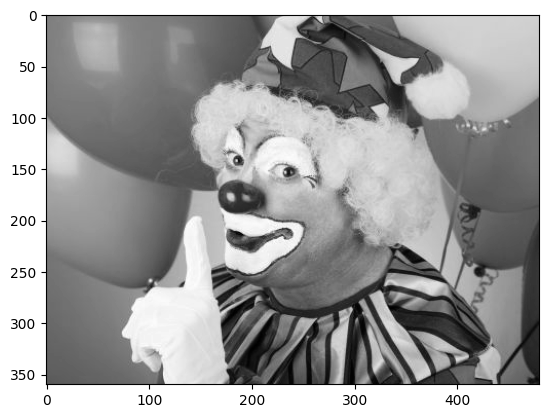

In [7]:
plt.imshow(face, cmap=plt.cm.gray)

In [8]:
k = 10
360 * 480 - (360 * 10 + 10 + 10 * 480)

164390

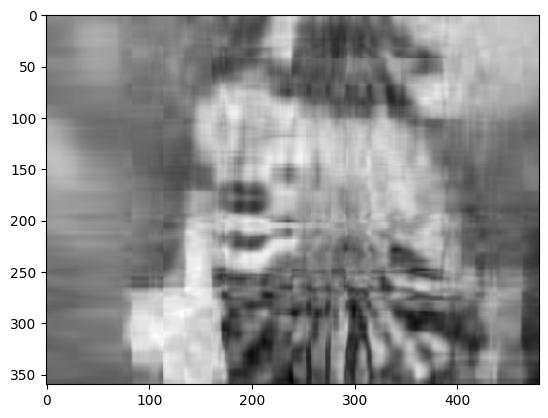

In [9]:
plt.imshow(V[:,:k] @ np.diag(D[:k]) @ U[:k, :], cmap=plt.cm.gray)

In [10]:
import sklearn.neighbors
from sklearn.decomposition import PCA

In [11]:
faces = np.load('../data/faces.npy')

In [12]:
faces.shape

(8832, 400)

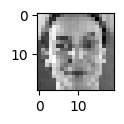

In [13]:
plt.figure(figsize=(2, 1))
plt.imshow(faces[9].reshape((20, 20)), cmap=plt.cm.gray)

In [14]:
pca = PCA(n_components=40)

In [15]:
pca.fit(faces)

PCA(n_components=40)

In [16]:
new_faces = pca.transform(faces)

In [17]:
new_faces.shape

(8832, 40)

In [18]:
kde = sklearn.neighbors.KernelDensity()

In [19]:
kde.fit(new_faces)

KernelDensity()

In [20]:
kde.sample()

array([[ 2.14345800e+02,  6.03350381e+01,  6.28661246e+02,
        -5.08999312e+02,  2.70616790e+02, -2.04394338e+02,
        -1.29446302e+02,  2.37417106e+02, -4.71165355e+01,
        -2.31384679e+02, -3.70176590e+01, -3.13932981e+01,
         8.00511641e+00, -1.39812447e+01, -3.56680069e+01,
        -3.68699292e-01,  3.65671866e+00, -3.57434749e+01,
         2.41305888e+01,  6.47126897e+01,  1.85955370e+02,
        -2.93366664e+01, -5.67809343e+01,  5.27377886e+01,
         2.76922712e+01, -5.26423162e+01, -7.20894083e+01,
         1.21313439e+02,  2.17956948e+01,  9.43425580e+01,
        -9.47056691e+01,  6.85586147e+00,  3.87840883e+01,
        -6.75354724e+01,  1.69182071e+01,  3.30586863e+01,
         2.37185704e+01, -1.43468969e+01, -5.65196469e+01,
        -3.26681788e+01]])

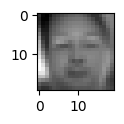

In [21]:
plt.figure(figsize=(2, 1))
s = kde.sample()
new_face = pca.inverse_transform(s)
plt.imshow(new_face.reshape((20, 20)), cmap=plt.cm.gray)